# Latar Belakang

New York Taxi and Limousine Commision(TLC) adalah badan pemerintahan yang bertanggung jawab atas regulasi dan pengawasan layanan taksi dan limusin di New York City . TLC didirikan pada tahun 1971 sebagai respon terhadap perubahan dalam industri taksi dan limusin di kota New York City tersebut.

# Pernyataan Masalah
Stackholder yang bersangkutan yaitu dari vendor manajer VeriFone Inc.

Stackholder ingin melakukan peningkatan profit dari bisnis taxinya dengan mengetahui tampat-tampat yang berpotensi ramai penumpang. strategi ini sangat penting bagi vendor dikarenakan akan meningkatkan profit dari sebuah perusahan VeriFone Inc.

saya sebagai seorang data analyst, akan menjawab pertanyaan berikut :

<b>Bagaimana cara meningkatkan profit perusahaan dan meningkatkan efektifitas lokasi penjemputan yang akurat ?</b>

# Data

Untuk menjawab peryataan permasalah diatas, kami akan menganalisa data NYCTLCTripRecord yang dikumpulkan oleh perusahan. Data dapat diakses <a href='https://drive.google.com/drive/folders/1NYHIL-RgVPW-HONz4pdzlcbIChF-c37N'>disini.</a>

In [1]:
import pandas as pd
import altair as alt 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

alt.data_transformers.enable('csv')

DataTransformerRegistry.enable('csv')

Data set ini berisikan informasi terkait trip perjalanan dari setiap taksi yang ada di New York City. Ada 17 kolom didalam data set NYCTLCTripRecord, yaitu seperti berikut :

* VendorID = Kode perusahan/ vendor yang berkerja sama dengan TLC.\
   1 = Creative Mobile Technologies, LLC.  
   2 = VeriFone Inc.

* lpep_pickup_datetime = Tanggal dan waktu penjemputan penumpang(ketika taximer dinyalakan).


* lpep_dropoff_datetime = Tanggal dan waktu menurunkan penumpang (ketika taximer dimatikan) .

 
* Passenger_count = Jumlah penumpang didalam kendaraan.


* Trip_distance = Jarak tempuh perjalanan dalam mill dihitung menggunakan taximeter selama perjalanan.


* PULocationID = Lokasi penjemputan.


* DOLocationID = Lokasi penurunan.


* RateCodeID =  kode tarif akhir bagi penumpang.\
   1 = Standard rate (tarif standar)\
   2 = JFK(kode tarif perjalanan menuju bandara John ef khanedy)\
   3 = Newark (kode tarif perjalanan menuju bandara Newrak liberty)\
   4 = Nassau or Westchester (kode tarif perjalanan menuju Nassau dan Westchester)\
   5 = Negotiated fare (tarif yang ditawar)\
   6 = Group ride(tarif perjalanan kelompok)

*  Store_and_fwd_flag = This flag indicates whether the trip record was held in the vehicle memory before sending to the vendor,aka “store and forward,” because the vehicle did not have a connection to the server.\
    Y = (catatan perjalanan disimpan diperangkat memory kendaran kemudian dikirim ke server)\
    N = (catatan perjalann dikirim langsung keserver tampa disimpan di perangkat memory)

*  Fare_Amount = Jumlah tarif penumpang yang dihitung berdasarkan waktu dan jarak tempuh serta pajak MTA sebesar 0.50 dolar dan 1 dolar pada jam sibuk dan jam malam.

* MTA_tax = Biyaya tambahan yang dikenakan untuk mendukung layanan transportasi umum didaerah metropolitan New York City, biyaya ini dikenakan saat perjalanan menggunakan taxi di New York City.

* Tip_amount = Jumlah tips yang diberikan penumpang.

* Tolls_amount = Jumlah biyaya masuk toll yang harus dibayar oleh penumpang.

* Improvement_surcharge = Biyaya tambahan sebesar 0.30 dolar untuk pelanggan yang ingin pesan secara langsung dijalan tampa memesan terlebih dahulu.

* Total_amount = Jumlah biyaya yang dikenakan penumpang selama perjalanan taxi (tidak termasuk tips).

* Paymen_type = Tipe pembayaran.\
    1 = Credit_card\
    2 = Cash\
    3 = No charge\
    4 = Dispute\
    5 = Unknow\
    6 = Voided trip
    
* Trip_type = 
    1 = Tipe penumpang secara langsung dijalan(street-hail) seperti melambaikan tangan dijalan tampa memesan melalui kantor pusat.
    2 = Tipe penumpang terlebih dahulu memesan melalui kantor pusat (dispatch) dan kantor pusat akan mencarikan taxi terdekat.


berikut 5 data baris pertama sebagai berikut : 



In [147]:
df = pd.read_csv('../data/NYCTLCTripRecord.csv', low_memory=False)
display(df.head(5) , df.tail(5))

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,14.9,1.0,0.5,4.03,0.0,NaN,1.0,24.18,1.0,1.0,2.75
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.81,10.7,1.0,0.5,2.64,0.0,NaN,1.0,15.84,1.0,1.0,0.00
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,N,1.0,223,179,1.0,0.00,7.2,1.0,0.5,1.94,0.0,NaN,1.0,11.64,1.0,1.0,0.00
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.30,6.5,0.5,1.5,1.70,0.0,NaN,1.0,10.20,1.0,1.0,0.00
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1.0,1.10,6.0,0.5,1.5,0.00,0.0,NaN,1.0,8.00,1.0,1.0,0.00


,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
68206,2,2023-01-31 22:29:00,2023-01-31 22:42:00,NaN,NaN,49,62,NaN,4070.82,15.70,0.0,0.0,0.00,0.0,NaN,1.0,16.70,NaN,NaN,NaN
68207,2,2023-01-31 22:40:00,2023-01-31 22:48:00,NaN,NaN,10,205,NaN,2.14,4.41,0.0,0.0,0.00,0.0,NaN,1.0,5.41,NaN,NaN,NaN
68208,2,2023-01-31 23:46:00,2023-02-01 00:02:00,NaN,NaN,66,37,NaN,3.44,16.53,0.0,0.0,3.51,0.0,NaN,1.0,21.04,NaN,NaN,NaN
68209,2,2023-01-31 23:01:00,2023-01-31 23:19:00,NaN,NaN,225,189,NaN,3.03,14.98,0.0,0.0,3.20,0.0,NaN,1.0,19.18,NaN,NaN,NaN
68210,2,2023-01-31 23:51:00,2023-02-01 00:07:00,NaN,NaN,256,140,NaN,5.82,23.65,0.0,0.0,2.00,0.0,NaN,1.0,29.40,NaN,NaN,NaN


## Data Understanding and Cleaning
Sebelum masuk ke dalam analisis, kita perlu mengenal dataset kita lebih jauh dalam tahapan *data understanding*. Dari proses ini, kita akan tahu anomali-anomali apa saja yang terdapat di dalam dataset kita dan perlu ditangani dalam tahapan *data cleaning*. Setiap penangan anomali yang dilakukan, akan disertai dengan justifikasi langkah yang diambil, baik secara *domain knowledge* maupun secara statistik.

Pertama, mari kita lihat informasi umur dari dataset NYCTLCTripRecord.

In [148]:
#Melihat info dari data kita
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68211 entries, 0 to 68210
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   VendorID               68211 non-null  int64  
 1   lpep_pickup_datetime   68211 non-null  object 
 2   lpep_dropoff_datetime  68211 non-null  object 
 3   store_and_fwd_flag     63887 non-null  object 
 4   RatecodeID             63887 non-null  float64
 5   PULocationID           68211 non-null  int64  
 6   DOLocationID           68211 non-null  int64  
 7   passenger_count        63887 non-null  float64
 8   trip_distance          68211 non-null  float64
 9   fare_amount            68211 non-null  float64
 10  extra                  68211 non-null  float64
 11  mta_tax                68211 non-null  float64
 12  tip_amount             68211 non-null  float64
 13  tolls_amount           68211 non-null  float64
 14  ehail_fee              0 non-null      float64
 15  im

In [149]:
#melihat karakteristik data statistik yang kita miliki
df.describe().T

,count,mean,std,min,25%,50%,75%,max
VendorID,68211.0,1.863028,0.343820,1.00,2.00,2.00,2.00,2.00
RatecodeID,63887.0,1.117160,1.372913,1.00,1.00,1.00,1.00,99.00
PULocationID,68211.0,98.549735,61.244314,1.00,74.00,75.00,129.00,265.00
DOLocationID,68211.0,138.429901,76.761311,1.00,74.00,138.00,219.00,265.00
passenger_count,63887.0,1.315870,0.979054,0.00,1.00,1.00,1.00,9.00
trip_distance,68211.0,8.114852,585.105955,0.00,1.11,1.85,3.21,120098.84
fare_amount,68211.0,16.603545,13.470121,-70.00,9.30,13.50,19.80,490.00
extra,68211.0,0.825431,1.269904,-2.50,0.00,0.00,1.00,12.50
mta_tax,68211.0,0.588340,0.385819,-0.50,0.50,0.50,0.50,2.75
tip_amount,68211.0,2.139012,3.052710,-10.50,0.00,1.60,3.33,222.22


In [150]:
#melihat kolom dengan tipe data object
df.describe(include='object').T

,count,unique,top,freq
lpep_pickup_datetime,68211,66575,2023-01-09 09:08:00,4
lpep_dropoff_datetime,68211,66519,2023-01-09 00:00:00,6
store_and_fwd_flag,63887,2,N,63579


In [151]:
pd.set_option('display.max_colwidth', 1000)

#Melihat isi kolom secara keseluruhan
isilist = []

for kolom in df.columns:
    isilist.append([kolom, df[kolom].nunique(), df[kolom].unique()])

descTable = pd.DataFrame(columns=['Nama Kolom', 'Jumlah Unique' , 'Isi Kolom'], data = isilist)

descTable

,Nama Kolom,Jumlah Unique,Isi Kolom
0,VendorID,2,"[2, 1]"
1,lpep_pickup_datetime,66575,"[2023-01-01 00:26:10, 2023-01-01 00:51:03, 2023-01-01 00:35:12, 2023-01-01 00:13:14, 2023-01-01 00:33:04, 2023-01-01 00:53:31, 2023-01-01 00:09:14, 2023-01-01 00:11:58, 2023-01-01 00:41:29, 2023-01-01 00:50:32, 2023-01-01 00:16:12, 2023-01-01 00:08:43, 2023-01-01 00:26:32, 2023-01-01 00:18:35, 2023-01-01 00:39:32, 2023-01-01 00:49:34, 2023-01-01 00:10:45, 2023-01-01 00:35:11, 2023-01-01 00:31:06, 2023-01-01 00:14:37, 2023-01-01 00:26:21, 2023-01-01 00:41:56, 2023-01-01 00:32:02, 2023-01-01 00:55:13, 2023-01-01 00:01:31, 2023-01-01 00:22:31, 2023-01-01 00:57:28, 2023-01-01 00:35:21, 2023-01-01 00:52:52, 2023-01-01 00:32:56, 2023-01-01 00:24:01, 2023-01-01 00:46:48, 2023-01-01 00:40:58, 2023-01-01 00:20:23, 2023-01-01 01:49:24, 2023-01-01 00:41:53, 2023-01-01 00:56:26, 2023-01-01 00:33:10, 2023-01-01 00:58:28, 2023-01-01 00:42:49, 2023-01-01 00:48:21, 2023-01-01 00:08:05, 2023-01-01 00:13:47, 2023-01-01 00:16:10, 2023-01-01 00:04:25, 2023-01-01 00:33:38, 2023-01-01 00:46:08, 2023-01-..."
2,lpep_dropoff_datetime,66519,"[2023-01-01 00:37:11, 2023-01-01 00:57:49, 2023-01-01 00:41:32, 2023-01-01 00:19:03, 2023-01-01 00:39:02, 2023-01-01 01:11:04, 2023-01-01 00:26:39, 2023-01-01 00:24:55, 2023-01-01 00:46:26, 2023-01-01 01:13:42, 2023-01-01 00:41:43, 2023-01-01 00:17:08, 2023-01-01 00:45:31, 2023-01-01 00:30:09, 2023-01-01 01:18:06, 2023-01-01 01:08:23, 2023-01-01 00:19:37, 2023-01-01 01:17:35, 2023-01-01 00:42:23, 2023-01-01 00:21:50, 2023-01-01 00:30:26, 2023-01-01 00:46:06, 2023-01-01 00:41:25, 2023-01-01 00:59:47, 2023-01-01 00:16:02, 2023-01-01 00:39:24, 2023-01-01 01:09:31, 2023-01-01 00:53:49, 2023-01-01 01:00:53, 2023-01-01 00:42:53, 2023-01-01 00:32:05, 2023-01-01 01:08:17, 2023-01-01 01:04:32, 2023-01-01 00:24:32, 2023-01-01 01:57:51, 2023-01-01 00:41:58, 2023-01-01 01:14:41, 2023-01-01 00:43:08, 2023-01-01 01:14:46, 2023-01-01 00:51:53, 2023-01-01 01:23:50, 2023-01-01 00:13:26, 2023-01-01 00:25:57, 2023-01-01 00:54:55, 2023-01-01 00:17:50, 2023-01-01 00:38:51, 2023-01-01 00:59:10, 2023-01-..."
3,store_and_fwd_flag,2,"[N, Y, nan]"
4,RatecodeID,6,"[1.0, 5.0, 4.0, 3.0, 2.0, 99.0, nan]"
5,PULocationID,226,"[166, 24, 223, 41, 181, 255, 75, 66, 195, 83, 97, 7, 42, 95, 260, 134, 130, 258, 129, 116, 92, 65, 74, 17, 152, 210, 112, 69, 243, 82, 179, 168, 80, 25, 145, 264, 33, 226, 52, 169, 36, 51, 157, 43, 256, 173, 70, 251, 40, 101, 61, 241, 146, 147, 228, 171, 138, 56, 244, 263, 196, 37, 236, 213, 28, 117, 14, 188, 177, 29, 262, 250, 72, 216, 22, 20, 139, 55, 257, 193, 127, 219, 3, 119, 265, 167, 150, 78, 135, 247, 93, 159, 48, 31, 91, 53, 160, 94, 47, 254, ...]"
6,DOLocationID,249,"[143, 43, 179, 238, 74, 262, 45, 75, 166, 140, 234, 148, 255, 186, 210, 129, 68, 260, 42, 24, 244, 146, 135, 173, 216, 142, 265, 164, 7, 83, 95, 130, 223, 80, 48, 263, 196, 250, 226, 239, 189, 41, 168, 162, 141, 33, 145, 151, 116, 195, 249, 235, 160, 98, 79, 229, 181, 193, 237, 233, 264, 102, 10, 37, 258, 82, 170, 61, 112, 231, 97, 17, 169, 96, 219, 243, 236, 56, 36, 114, 157, 161, 54, 90, 40, 188, 70, 63, 251, 101, 92, 153, 53, 57, 256, 65, 257, 138, 85, 52, ...]"
7,passenger_count,10,"[1.0, 2.0, 4.0, 3.0, 6.0, 5.0, 0.0, 7.0, 9.0, 8.0, nan]"
8,trip_distance,1870,"[2.58, 1.81, 0.0, 1.3, 1.1, 2.78, 3.8, 1.88, 1.11, 4.22, 4.8, 1.99, 7.08, 3.23, 5.91, 11.3, 8.28, 2.02, 0.96, 0.53, 1.51, 0.88, 2.48, 3.53, 2.25, 4.29, 2.53, 1.7, 10.44, 6.78, 1.39, 1.31, 6.7, 3.52, 1.74, 2.31, 1.37, 10.35, 1.05, 6.19, 2.8, 1.13, 3.19, 1.26, 2.87, 8.55, 4.46, 1.18, 2.5, 9.01, 0.63, 2.08, 1.47, 7.83, 2.15, 12.73, 1.62, 7.3, 2.73, 4.9, 2.17, 0.6, 0.8, 2.39, 1.23, 10.45, 2.23, 2.21, 5.2, 5.25, 6.32, 3.82, 3.58, 0.7, 2.91, 5.13, 12.4, 1.45, 7.52, 2.45, 0.54, 0.47, 1.16, 15.39, 5.34, 2.56, 14.97, 0.62, 0.87, 0.01, 0.86, 2.38, 2.64, 11.34, 1.61, 2.0, 4.08, 10.96, 6.14, 3.16, ...]"
9,fare_amount,2553,"[14.9, 10.7, 7.2, 6.5, 6.0, 17.7, 19.1, 14.2, 24.7, 26.8, 11.4, 30.3, 35.9, 32.5, 15.0, 44.3, 12

Selanjutnya saya melakukan filter terhadap kolom VendorID yang ber Id 2 dengan vendor VeriFone Inc. kemudian saya akan menghapus kolom yang tidak diperlukan seperti kolom <b>extra</b>, <b>ehail_fee</b> dan <b>congestion_surcharge</b> dikarenakan tidak ada diketerangan pada data set sehingga tidak relevan digunakan.

In [152]:
#melakukan filter terhadap kolom vendor_id = 2
df = df[df['VendorID'] == 2]

#menghapus kolom extra, ehail_fee dan congestion_surcharge.
df = df.drop(['extra', 'ehail_fee', 'congestion_surcharge'], axis=1)

Setelah melakukan filter data yang kita perlukan, step selanjutnya yaitu menghapus kolom <b>extra</b>, <b>ehail_fee</b> dan <b>congestion_surcharge</b> dikarenakan kolom ini tidak ada pada dictionary sehingga tidak relevan apabila digunakan.

In [153]:
#Hasil setelah melakukan drop kolom yang tidak relevan
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 58868 entries, 0 to 68210
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   VendorID               58868 non-null  int64  
 1   lpep_pickup_datetime   58868 non-null  object 
 2   lpep_dropoff_datetime  58868 non-null  object 
 3   store_and_fwd_flag     54672 non-null  object 
 4   RatecodeID             54672 non-null  float64
 5   PULocationID           58868 non-null  int64  
 6   DOLocationID           58868 non-null  int64  
 7   passenger_count        54672 non-null  float64
 8   trip_distance          58868 non-null  float64
 9   fare_amount            58868 non-null  float64
 10  mta_tax                58868 non-null  float64
 11  tip_amount             58868 non-null  float64
 12  tolls_amount           58868 non-null  float64
 13  improvement_surcharge  58868 non-null  float64
 14  total_amount           58868 non-null  float64
 15  payment

Setelah kita mendapatkan kolom yang diperlukan, maka selanjutnya yaitu mengecek apakah terdapat data yang duplikat.

In [154]:
#Mengecek data duplikat
df.duplicated().value_counts()

False    58868
Name: count, dtype: int64

Selamatt... untuk kali ini data <b>tidak ada</b> yang bernilai True atau kata lain <b>tidak ada data duplikat<b/>.

Selanjutnya yaitu melakukan pengecekan terhadap kolom <b>lpep_pickup_datetime</b> dan <b>lpep_dropoff_datetime</b>, saya harus melakukan pengecekan terlebih dahulu tipe datanya sudah date_time atau belum. Apabila kolom ini belum maka kita harus merubah tipe data tersebut menjadi date_time. 

In [155]:
#Mengecek tipe data dari kolom lpep_pickup_datetime dan lpep_dropoff_datetime
df[['lpep_pickup_datetime', 'lpep_dropoff_datetime']].info()

<class 'pandas.core.frame.DataFrame'>
Index: 58868 entries, 0 to 68210
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   lpep_pickup_datetime   58868 non-null  object
 1   lpep_dropoff_datetime  58868 non-null  object
dtypes: object(2)
memory usage: 1.3+ MB


In [156]:
#Mengconvert tipe data object menjadi tipe data date_time pada kolom lpep_pickup_datetime
df['lpep_pickup_datetime'] = pd.to_datetime(df['lpep_pickup_datetime'])
df['lpep_dropoff_datetime'] = pd.to_datetime(df['lpep_dropoff_datetime'])

In [157]:
#Mengecek tipe data dari kolom lpep_pickup_datetime dan lpep_dropoff_datetime yang sudah di convert
df[['lpep_pickup_datetime', 'lpep_dropoff_datetime']].info()

<class 'pandas.core.frame.DataFrame'>
Index: 58868 entries, 0 to 68210
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   lpep_pickup_datetime   58868 non-null  datetime64[ns]
 1   lpep_dropoff_datetime  58868 non-null  datetime64[ns]
dtypes: datetime64[ns](2)
memory usage: 1.3 MB


## Missing Value
Langkah selanjutnya yaitu mengecek apakah data kita terdapat missing value atau tidak.

In [158]:
#Mengecek missing value
df.isna().sum()

VendorID                    0
lpep_pickup_datetime        0
lpep_dropoff_datetime       0
store_and_fwd_flag       4196
RatecodeID               4196
PULocationID                0
DOLocationID                0
passenger_count          4196
trip_distance               0
fare_amount                 0
mta_tax                     0
tip_amount                  0
tolls_amount                0
improvement_surcharge       0
total_amount                0
payment_type             4196
trip_type                4196
dtype: int64

In [159]:
#Mengecek persentase dari kolom yang terdapat missing value
round(df.isna().sum()/len(df)*100,2)

VendorID                 0.00
lpep_pickup_datetime     0.00
lpep_dropoff_datetime    0.00
store_and_fwd_flag       7.13
RatecodeID               7.13
PULocationID             0.00
DOLocationID             0.00
passenger_count          7.13
trip_distance            0.00
fare_amount              0.00
mta_tax                  0.00
tip_amount               0.00
tolls_amount             0.00
improvement_surcharge    0.00
total_amount             0.00
payment_type             7.13
trip_type                7.13
dtype: float64

<Axes: >

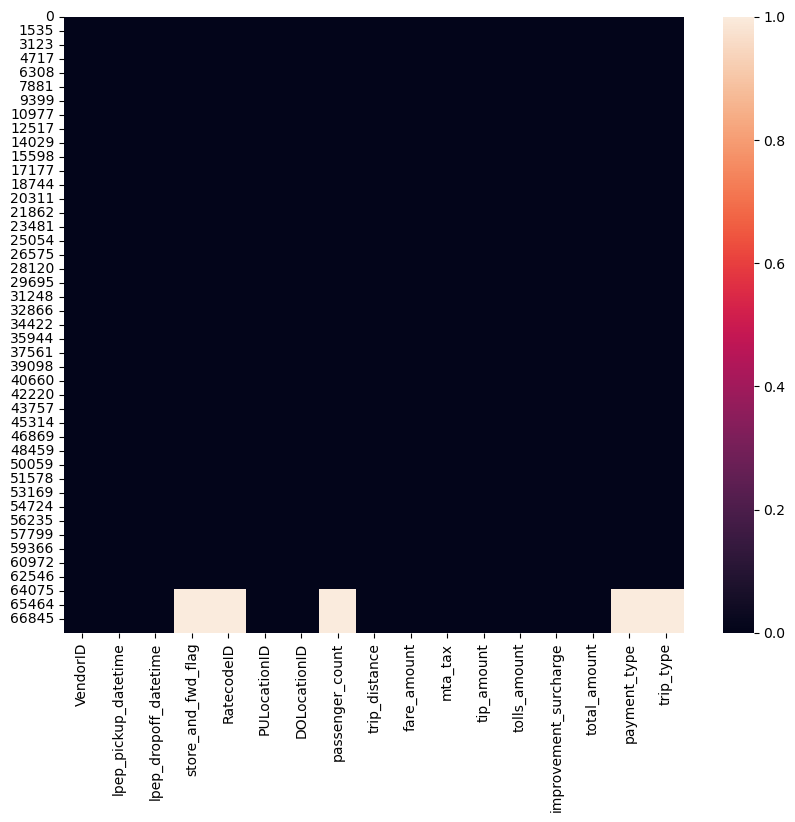

In [160]:
#Mengecek missing value pada masing-masing kolom secara detail
plt.figure(figsize=(10,8))
sns.heatmap(df.isna())

<Axes: >

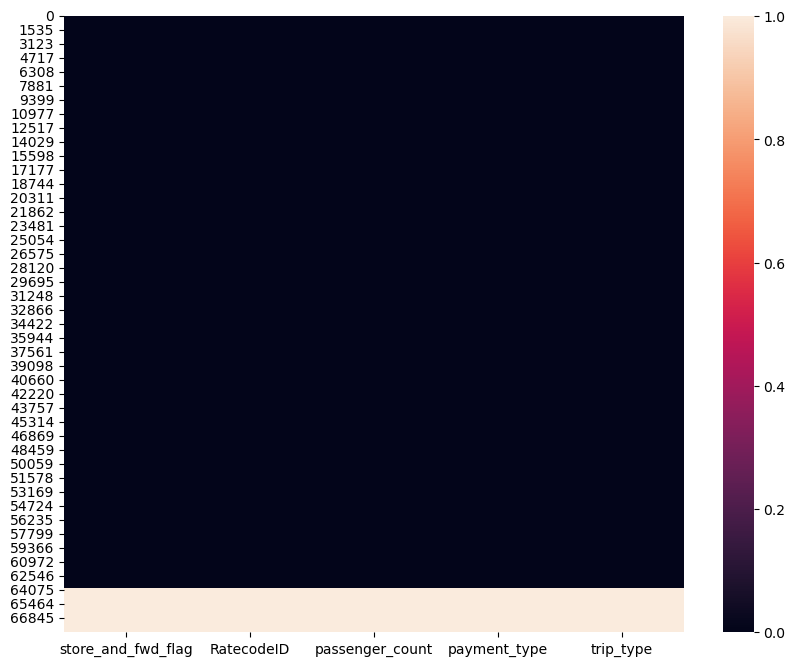

In [161]:
#Mengecek missing value pada kolom yang memiliki missing value secara detail
plt.figure(figsize=(10,8))
sns.heatmap(df[['store_and_fwd_flag','RatecodeID', 'passenger_count', 'payment_type', 'trip_type']].isna())

Dari data visualisasi diatas terdapat informasi
* Missing value pada kolom <b>store_and_fwd_flag</b>, <b>RatecodeID</b>, <b>passenger_count</b>, <b>payment_type</b> dan <b>trip_type</b> memiliki persentase missing yang kecil yaitu < 10% dari data.

Dalam menanggani missing value ada 2 cara yang bisa dilakukan yaitu :
1. Menghapus baris atau kolom yang berisi missing value
Cara ini dapat digunakan ketika missing value tergolong sedikit, penghapusan missing value dengan cara ini akan meningkatkan akurasi analisa data sehingga pada kasus data kita yang memiliki < 10% missing value maka lebih baik menggunakan cara ini.
2. Mengisi missing value
Cara ini dapat digunakan apabila persentase missing value tinggi, sehingga untuk menanggani kasus ini jika menggunakan cara pertama akan menjadi dampak yang besar pada data kita.\
Terdapat beberapa metode untuk mengisi missing value yaitu:
* Mengisi nilai data dengan nilai sebenarnya atau sedekat dengan nilai aslinyas(secara domain knowledge) yang ada kaitanya dengan kolom missing value.
* Jika masih terdapat missing value maka kita bisa mengisi dengan pendekatan statistik seperti mean,median dan modulus.


In [162]:
#Menghapus baris data yang mengandung missing value atau Nan
df = df.dropna(axis=0)

In [163]:
#Melakukan pengecekan data yang sudah dilakukan dropna
df.isna().sum()

VendorID                 0
lpep_pickup_datetime     0
lpep_dropoff_datetime    0
store_and_fwd_flag       0
RatecodeID               0
PULocationID             0
DOLocationID             0
passenger_count          0
trip_distance            0
fare_amount              0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
payment_type             0
trip_type                0
dtype: int64

### RatecodeID
Setalah melakukan pengecekan missing value selanjutnya yaitu merubah kolom RatecodeID yang tadinya int menjadi kategori untuk keperluan analisis.

In [164]:
#Mengubah tipe data int menjadi categori pada kolom ratecodeID
#Mengubah tipe data int menjadi categori pada kolom ratecodeID
df.loc[:, 'RatecodeID']  = df['RatecodeID'].replace({
    1 : 'Standard rate',
    2 : 'JFK',
    3 : 'Newark',
    4 : 'Nassau or Westchester',
    5 : 'Negotiated fare',
})
df['RatecodeID'].value_counts()

RatecodeID
Standard rate            53001
Negotiated fare           1451
JFK                        144
Nassau or Westchester       50
Newark                      26
Name: count, dtype: int64

### Payment_type

In [165]:
#Mengubah tipe data int menjadi categori pada kolom payment_type
df.loc[:, 'payment_type']  = df['payment_type'].replace({
    1 : 'Credit card',
    2 : 'Cash',
    3 : 'No charge',
    4 : 'Dispute',
})
df['payment_type'].value_counts()


payment_type
Credit card    34572
Cash           19758
No charge        278
Dispute           64
Name: count, dtype: int64

### Trip_type

In [166]:
#Mengubah tipe data int menjadi categori pada kolom Trip_type
df.loc[:,'trip_type'] = df['trip_type'].replace({
    1 : 'Street-hail',
    2 : 'Dispath'
})
df['trip_type'].value_counts()

trip_type
Street-hail    53332
Dispath         1340
Name: count, dtype: int64

## Data yang sudah bersih

In [167]:
#Melakukan pengecekan kolom kategori pada data
kolom_category = [kolom for kolom in df.columns if df[kolom].dtype == 'object']
kolom_category

['store_and_fwd_flag', 'RatecodeID', 'payment_type', 'trip_type']

In [168]:
#Melakukan pengecekan jumlah kolom pada data
jumlah_kolom = [kolom for kolom in df.columns if df[kolom].dtype == 'float64'] + [kolom for kolom in df.columns if df[kolom].dtype == 'int64']
jumlah_kolom

['passenger_count',
 'trip_distance',
 'fare_amount',
 'mta_tax',
 'tip_amount',
 'tolls_amount',
 'improvement_surcharge',
 'total_amount',
 'VendorID',
 'PULocationID',
 'DOLocationID']

In [169]:
display(df.head(), df.tail())

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,Standard rate,166,143,1.0,2.58,14.9,0.5,4.03,0.0,1.0,24.18,Credit card,Street-hail
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,Standard rate,24,43,1.0,1.81,10.7,0.5,2.64,0.0,1.0,15.84,Credit card,Street-hail
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,N,Standard rate,223,179,1.0,0.00,7.2,0.5,1.94,0.0,1.0,11.64,Credit card,Street-hail
5,2,2023-01-01 00:53:31,2023-01-01 01:11:04,N,Standard rate,41,262,1.0,2.78,17.7,0.5,0.00,0.0,1.0,22.95,Cash,Street-hail
7,2,2023-01-01 00:11:58,2023-01-01 00:24:55,N,Standard rate,24,75,1.0,1.88,14.2,0.5,0.00,0.0,1.0,16.70,Cash,Street-hail


,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type
63882,2,2023-01-31 23:09:22,2023-01-31 23:17:21,N,Negotiated fare,130,205,1.0,2.75,15.0,0.0,2.00,0.0,0.3,17.30,Credit card,Dispath
63883,2,2023-01-31 23:06:18,2023-01-31 23:17:03,N,Standard rate,65,181,1.0,2.44,13.5,0.5,3.20,0.0,1.0,19.20,Credit card,Street-hail
63884,2,2023-01-31 23:17:03,2023-01-31 23:23:04,N,Standard rate,244,116,1.0,1.40,9.3,0.5,2.36,0.0,1.0,14.16,Credit card,Street-hail
63885,2,2023-01-31 23:29:18,2023-01-31 23:38:50,N,Standard rate,74,238,1.0,2.47,13.5,0.5,3.75,0.0,1.0,22.50,Credit card,Street-hail
63886,2,2023-01-31 23:00:12,2023-01-31 23:10:08,N,Standard rate,95,95,1.0,1.39,11.4,0.5,4.17,0.0,1.0,18.07,Credit card,Street-hail


/var/folders/3w/3k0gr_6n27j9v7gzwhpxlnrr0000gn/T/ipykernel_93640/3074858319.py:6: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, len(jumlah_kolom), i+1)
/var/folders/3w/3k0gr_6n27j9v7gzwhpxlnrr0000gn/T/ipykernel_93640/3074858319.py:6: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, len(jumlah_kolom), i+1)


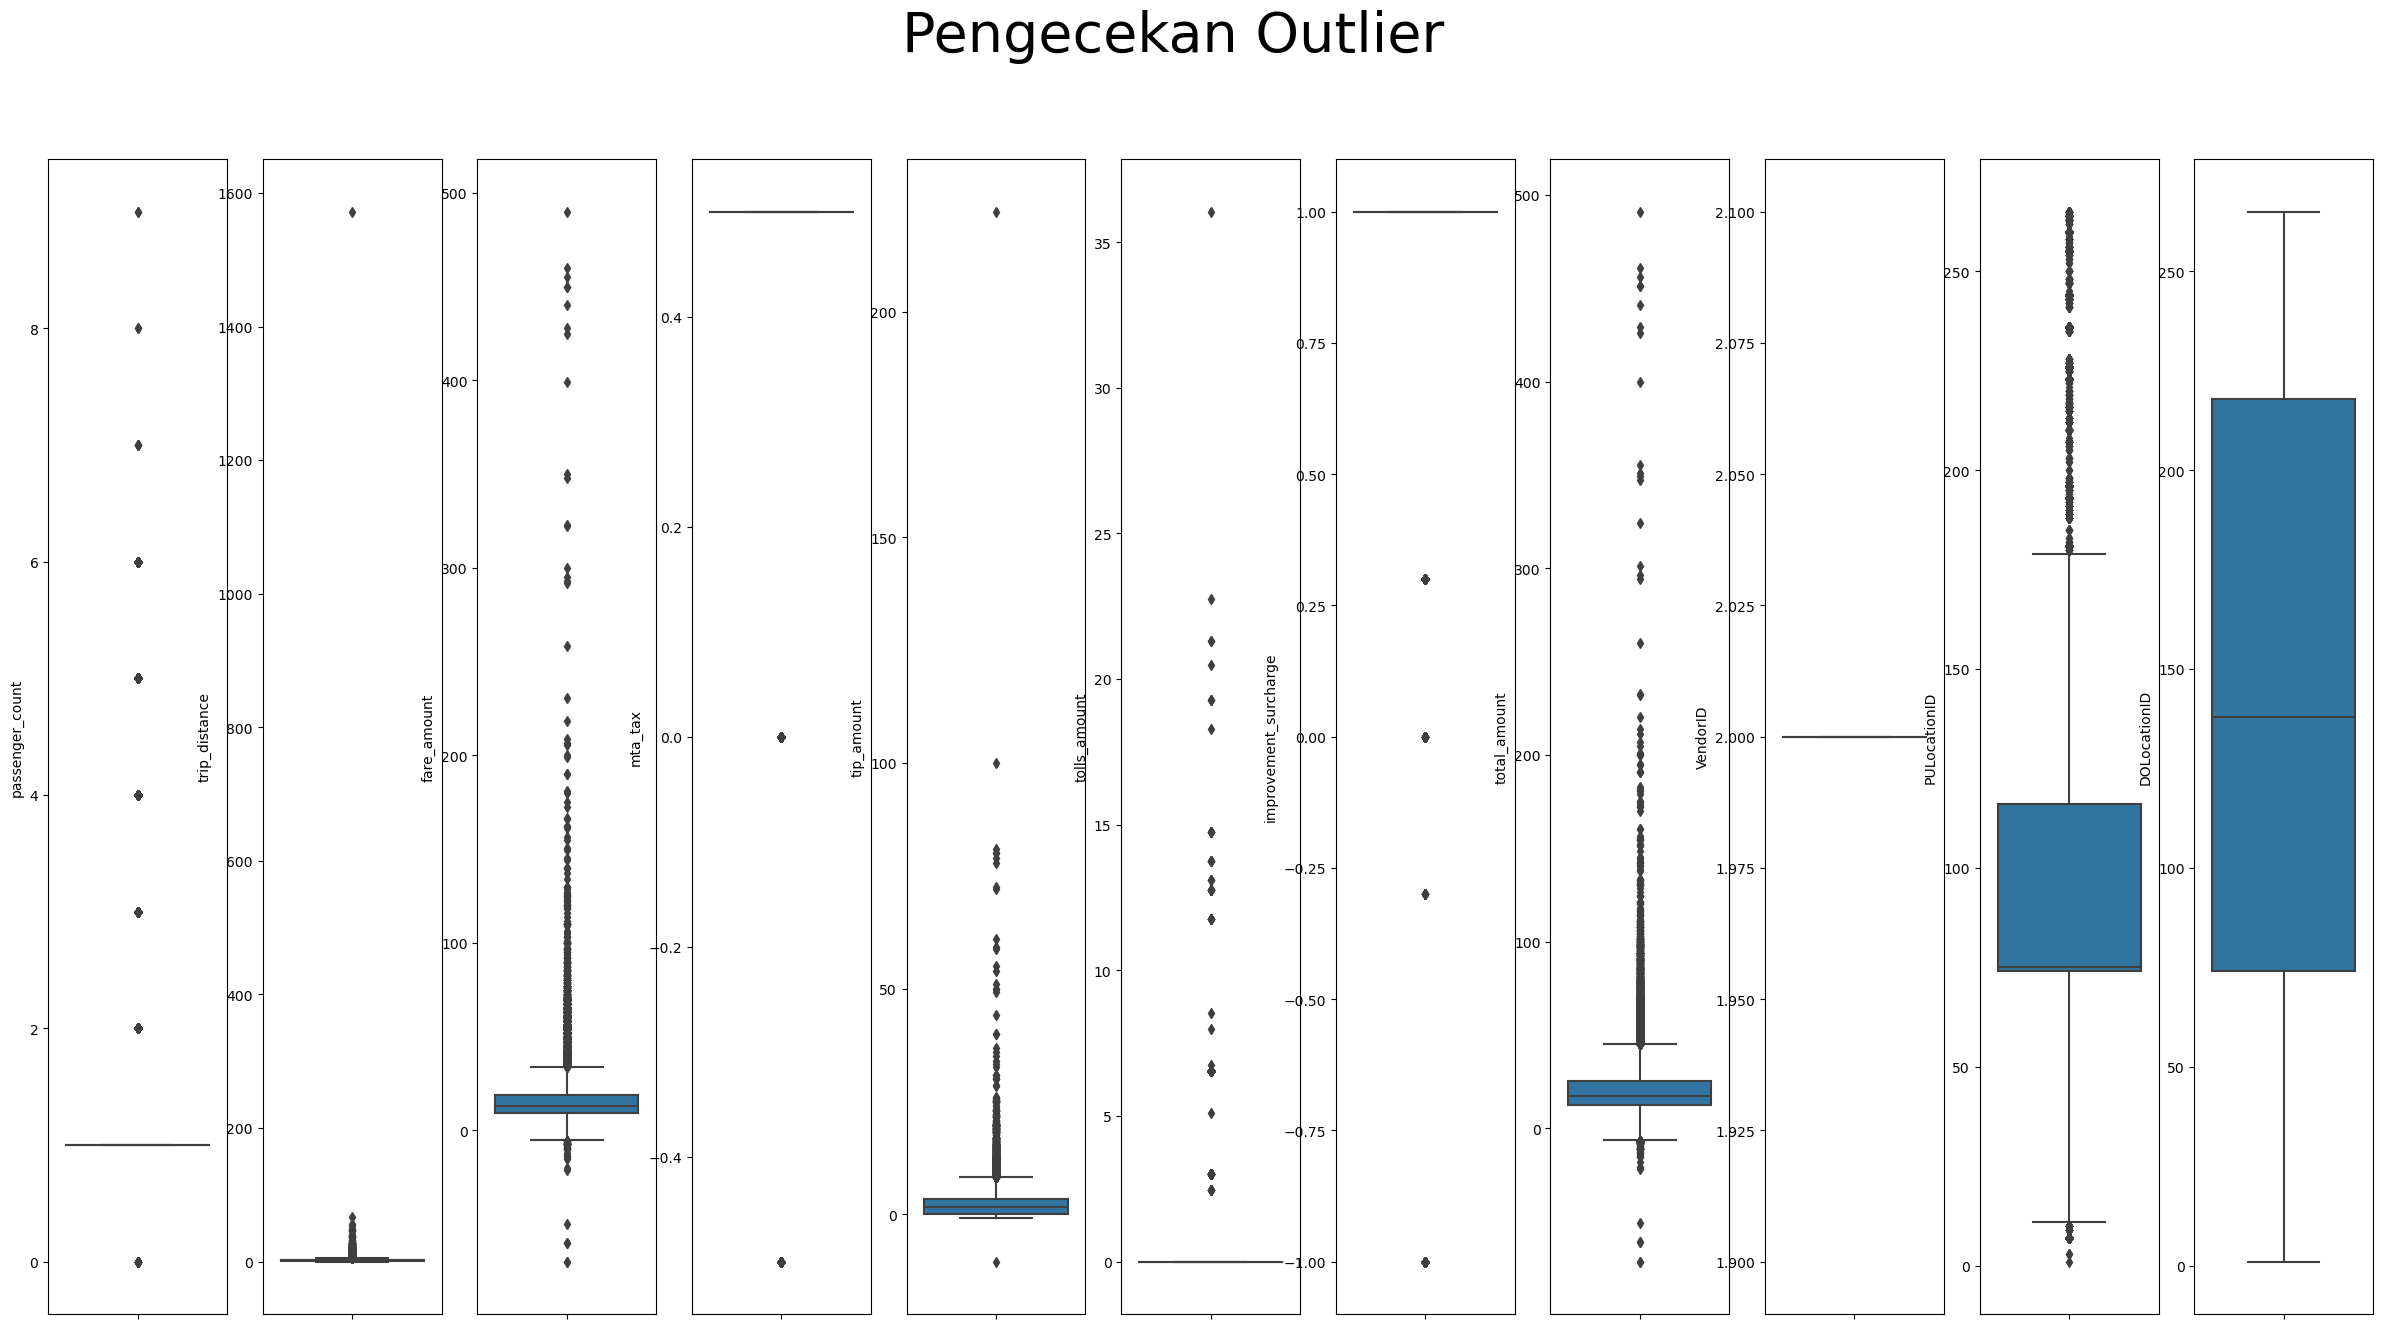

In [170]:
#Mengecek outlayer
fig, axes = plt.subplots(1,2 , figsize=(30,15))
fig.suptitle('Pengecekan Outlier', fontsize=40)

for i in range(0, len(jumlah_kolom)):
    plt.subplot(1, len(jumlah_kolom), i+1)
    sns.boxplot(y=df[jumlah_kolom[i]], orient='v')

Dari Visualisasi boxplot diatas hanya kolom <b>DOLocationID</b> dan <b>PULocationID</b> yang tidak ada outlier karena termasuk data kategori.

sedangkan untuk kolom lain terdapat outlier disemua numerical.

Kolom data yang kita perlukan sudah bersih tampa ada outliyer dan missing value, selanjutnya yaitu export file ke exel untuk keperluan visualisasi.


# Data Analysis
Kita sudah melakukan tahap data cleaning.

Sekarang kita bisa mulai melakukan analisa untuk mencari bagaimana cara meningkatkan profit perusahaan dan meningkatkan efektifitas lokasi pickup customer.

Pertama mari kita cek terlebih dahulu apakah terdapat anomali pada data tersebut seperti tidak sesuai dengan domain knowladge

In [171]:
#Export file yang sudah bersih ke exel, untuk keperluan visualisasi data ditablue
df.to_excel('data_tlc.xlsx', index=False)

## Berdasarkan Total amount yang Minus

In [172]:
total_amount_minus = df[df['total_amount'] < 0]
print (len(total_amount_minus))
print (len(total_amount_minus)/len(df)*100)

174
0.3182616330114135


Pada umumnya, jika seorang customer melakukan perjalanan, maka <b>total_amount</b> yang diperoleh tidaklah minus. Hal ini menindikasikan kolom total_amount terdapat anomali atau nilai yang tidak sewajarnya. 

In [173]:
df['payment_type'].value_counts()

payment_type
Credit card    34572
Cash           19758
No charge        278
Dispute           64
Name: count, dtype: int64

In [174]:
total_amount_minus['payment_type'].value_counts()

payment_type
No charge    139
Dispute       32
Cash           3
Name: count, dtype: int64

Trip/perjalanan yang memiliki nilai minus dari kolom total_amount terdapat di metode pembayaran payment_type:
* No Charge sekitar 80% dari total semua payment_type.
* Dispute sekitar 18% dari total semua payment_type.
* Cash sekitar 2% dari total semua payment_type.

## Berdasarkan Lokasi Penumpang

In [175]:
#Mencari 5 lokasi penjemputan yang ramai
df_lok_ramai = df['PULocationID'].value_counts().reset_index().rename(columns={'index' : 'PULocationID', 'PULocationID' : 'PULocationID'})
df_lok_ramai.head()

,PULocationID,count
0,74,10565
1,75,7679
2,95,3725
3,41,3341
4,166,3189


In [176]:
#Mencari lokasi yang tidak efisien yang sepi penumpang
df_lok_sepi = df_lok_ramai[df_lok_ramai['count'] < 11]
df_lok_sepi = df_lok_sepi.groupby('count').count().reset_index().sort_values('PULocationID', ascending= False)
df_lok_sepi['count'] = df_lok_sepi['count'].astype(str)
df_lok_sepi

,count,PULocationID
0,1,18
1,2,15
4,5,11
3,4,10
5,6,9
2,3,8
6,7,5
7,8,5
8,9,5
9,10,5


In [177]:
#Untuk meningkatkan peluang mendapatkan pelanggan, saya melakukan filter dengan jumlah trip lebih dari 11
df_lok_ramai['PULocationID'][df_lok_ramai['count'] >= 11].sum()

13103

In [178]:
loc_kurang_11 = df_lok_ramai['PULocationID'][df_lok_ramai['count'] < 11].count()
loc_lebih_11 = df_lok_ramai['PULocationID'][df_lok_ramai['count'] >= 11].count()

df_loc_lebih_11 = pd.DataFrame({
    'location' : ['kurang dari 11', 'lebih dari 11'],
    'count' : [loc_kurang_11, loc_lebih_11]
})

In [179]:
df_loc_lebih_11

,location,count
0,kurang dari 11,91
1,lebih dari 11,97


In [180]:
#dikarenakan distrinusi yang diproleh tidak normal (terdapat banyak outliyer ), maka digunakan median.
df_lok_ramai['count'].median()

11.0

<function matplotlib.pyplot.show(close=None, block=None)>

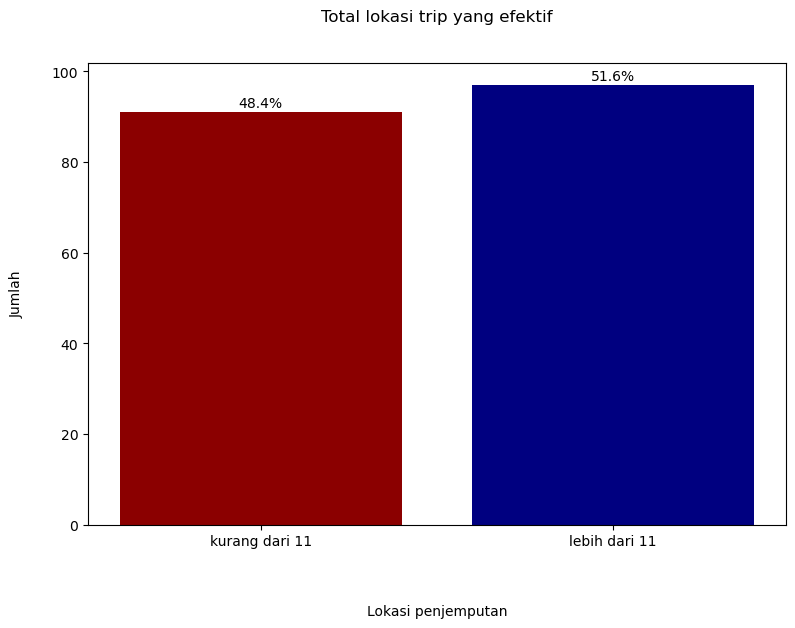

In [181]:
colors = ['#8b0000', '#000080']

plt.figure(figsize=(9,6))
plt.title('Total lokasi trip yang efektif', pad=30)
plt.xlabel('Lokasi penjemputan', labelpad=40)
plt.ylabel('Jumlah', labelpad=20)


plt.bar(df_loc_lebih_11['location'], df_loc_lebih_11['count'], color = colors)

total = sum(df_loc_lebih_11['count'])

for i, v in enumerate(df_loc_lebih_11['count']):
    persen = v/total *100
    plt.text(i,v+1, f'{persen:.1f}%', ha='center')

plt.show

Dari visualisasi diataas, terdapat lokasi yang kurang efektif dengan total penjemputan kurang dari 11 sebesar 48%.

In [182]:
#total lokasi penjemputan penumpang
df['PULocationID'].nunique()

188

In [183]:
#total lokasi penurunan penumpang
df['DOLocationID'].nunique()

245

In [184]:
#Untuk mengefisienkan lokasi penjemputan kita bisa fokuskan ke 10 tempat ramai penjemputan.
df_top_10 = df['PULocationID'].value_counts().head(10).reset_index().rename(columns={'index' : 'PULocationID', 'PULocationID' : 'PULocationID'})
df_top_10['PULocationID'] = df_top_10['PULocationID'].astype(str)
df_top_10

,PULocationID,count
0,74,10565
1,75,7679
2,95,3725
3,41,3341
4,166,3189
5,82,2644
6,43,2638
7,97,1847
8,7,1708
9,42,1304


In [185]:
df['PULocationID'].value_counts().reset_index().rename(columns={'index' : 'PULocationID', 'PULocationID' : 'PULocationID'}).sum()

PULocationID    24838
count           54672
dtype: int64

In [186]:
df_top_10['count'].sum()

38640

In [187]:
# Membuat bar chart dengan Altair
bar_chart = alt.Chart(df_top_10).mark_bar().encode(
    x=alt.X('PULocationID:O', title='Id Lokasi Penjemputan/pickup',sort='-y', axis=alt.Axis(labelAngle=0)),
    y=alt.Y('count:Q', title='Jumlah Trip'),
).properties(
    title='Top 10 Lokasi Teramai Penjemputan',
    width=600,
    height=400
)

# Menambahkan layer text untuk menampilkan jumlah value di setiap bar
text = bar_chart.mark_text(
    align='center',
    baseline='middle',
    dy=-5  # Penyesuaian posisi teks agar berada di atas bar
).encode(
    text='count:Q'  # Menampilkan jumlah count di setiap bar
)

chart_with_text = (bar_chart + text)  # Menggabungkan chart bar dan text

chart_with_text

alt.LayerChart(...)

Dari visualisasi diatas, informasi yang diperoleh berupa:

<b>id Lokasi 74 memiliki jumlah trip tertinggi</b> dari yang lainya.

<b>Rekomendasi :</b> 

Maka dari itu saya menyarankan untuk para sopir taxi bisa stand by di id lokasi 74 yang ramai pengunjung sehingga harapanya meningkatkan profit perusahaan.


## Berdasarkan Trip Type

In [188]:
df_trip_type = df['trip_type'].value_counts().reset_index().rename(columns={'index': 'trip_type', 'trip_type': 'trip_type'})
df_trip_type

,trip_type,count
0,Street-hail,53332
1,Dispath,1340


<function matplotlib.pyplot.show(close=None, block=None)>

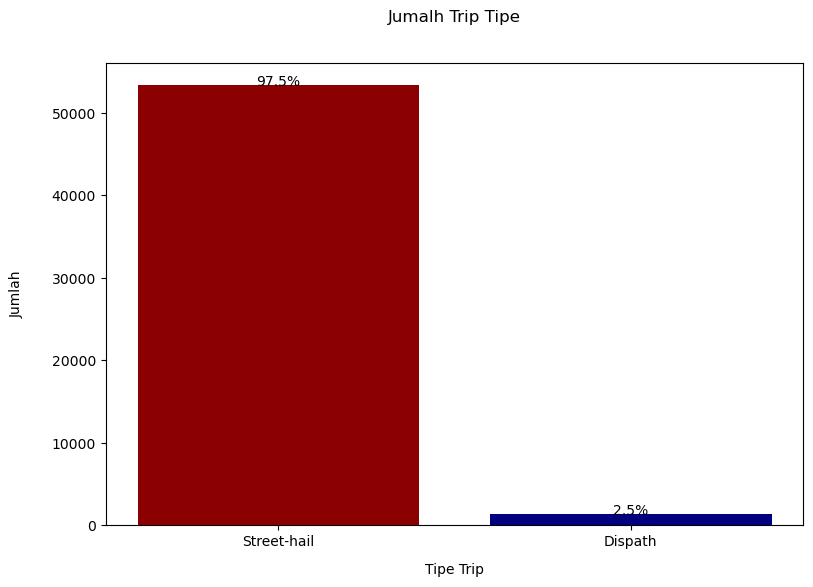

In [214]:
colors = ['#8b0000', '#000080']

plt.figure(figsize=(9,6))
plt.title('Jumalh Trip Tipe', pad=30)
plt.xlabel('Tipe Trip', labelpad=10)
plt.ylabel('Jumlah', labelpad=20)


plt.bar(df_trip_type['trip_type'], df_trip_type['count'], color = colors)

total = sum(df_trip_type['count'])

for i, v in enumerate(df_trip_type['count']):
    persen = v/total *100
    plt.text(i,v+1, f'{persen:.1f}%', ha='center')

plt.show

Dari hasil visualisasi diatas, dapat informasi berupa:

Jumlah <b>Trip Dispath</b>(memesan terlebih dahulu) sangatlah sedikit sekitar 2.5% jika dibandingkan dengan <b>Street-hail</b> (memesan secara langsung dijalan).

<b>Rekomendasi :</b> 

Sebaliknya perusahaan dapat meningkatkan performa dan kualitas dari segi pelayanan pemesanan terlebih dahulu, Hal ini bertujuan untuk membuat para customer yang memesan secara Steet-hail diarahkan menjadi Dispute sehingga bisa dapat bersaing dengan kompetitor lain seperti uber. Hal ini sangat direkomendasikan agar perusahaan dapat berbisnis dengan memandaafkan kemajuan teknologi zaman sekarang dan tentunya dapat meningkatkan penghasilan dari perusahaan.

## Berdasarkan Trip Distance

In [190]:
#mengecek jarak perjalanan yang kurang dari 0
trip_distance_0 = df[df['trip_distance'] <= 0]
len(trip_distance_0)

1709

In [191]:
#cek baris trip distance yang kurang dari 0
trip_distance_0.head()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,N,Standard rate,223,179,1.0,0.0,7.2,0.5,1.94,0.0,1.0,11.64,Credit card,Street-hail
58,2,2023-01-01 00:57:15,2023-01-01 01:00:15,N,Standard rate,75,75,1.0,0.0,4.4,0.5,1.38,0.0,1.0,8.28,Credit card,Street-hail
99,2,2023-01-01 01:27:36,2023-01-01 01:27:43,N,Negotiated fare,168,168,0.0,0.0,20.0,0.0,0.00,0.0,1.0,21.00,Credit card,Dispath
107,2,2023-01-01 01:11:13,2023-01-01 01:11:36,N,Standard rate,7,7,1.0,0.0,3.0,0.5,9.00,0.0,1.0,14.50,Credit card,Street-hail
115,2,2023-01-01 01:52:58,2023-01-01 01:53:00,N,Standard rate,264,264,1.0,0.0,3.0,0.5,21.50,0.0,0.3,26.30,Credit card,Street-hail


In [192]:
#membuat data frame trip_distance
df_trip_distance = pd.DataFrame({
    'Trip_distance' : ['Kurang dari 0', 'Normal'],
    'Count' :[len(trip_distance_0), len(df)] 
})
df_trip_distance

,Trip_distance,Count
0,Kurang dari 0,1709
1,Normal,54672


<function matplotlib.pyplot.show(close=None, block=None)>

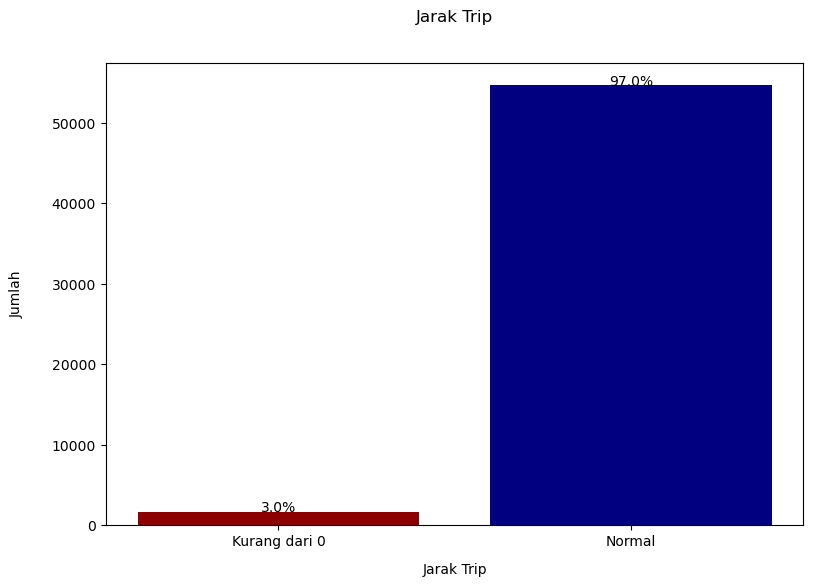

In [193]:
colors = ['#8b0000', '#000080']

plt.figure(figsize=(9,6))
plt.title('Jarak Trip', pad=30)
plt.xlabel('Jarak Trip', labelpad=10)
plt.ylabel('Jumlah', labelpad=20)


plt.bar(df_trip_distance['Trip_distance'], df_trip_distance['Count'], color = colors)

total = sum(df_trip_distance['Count'])

for i, v in enumerate(df_trip_distance['Count']):
    persen = v/total *100
    plt.text(i,v+1, f'{persen:.1f}%', ha='center')

plt.show

Dari hasil visualisasi diatas, informasi yang diperoleh berupa: 

Terdapat anomali, yaitu trip_distance yang kurang dari 0 sebesar 3%.

Hall ini kemungkinan alat taxi meter pada beberapa taksi mengalami kerusakan sehingga ada beberapa perjalanan yang memliki trip distance 0.

<b>Rekomendasi :</b> 

Melakukan pengecekan taksi secara berkala untuk menghindari segala kecurangan dari pihak supir karena tidak terekamnya pengukuran jarak. Hal tersebut dapat menurunkan tingkat kepercayaan penumpang karena taksi meter rusak.

## Berdasarkan waktu Terbaik

In [194]:
from datetime import datetime

df['day'] = pd.to_datetime(df['lpep_pickup_datetime']).apply(lambda x : datetime.strftime(x,'%A'))

In [195]:
#Mencari hari paling ramai penumpang berdasarkan total tripnya
df_hari = df['day'].value_counts().reset_index().rename(columns={'index': 'Day', 'day': 'day'})
df_hari

,day,count
0,Tuesday,9006
1,Thursday,8112
2,Friday,8000
3,Wednesday,7970
4,Monday,7904
5,Saturday,6939
6,Sunday,6741


In [216]:
#membuat visualisasi dengan line chart
line_chart = alt.Chart(df_hari).mark_line().encode(
    x=alt.X('day:N', title='Day', axis=alt.Axis(labelAngle=0, orient='bottom',titlePadding=15, titleFontSize=14)),  # Menentukan tipe data kategori (Nominal)
    y=alt.Y('count', title='Jumlah Penumpang'),
    tooltip=['day', 'count']
).properties(
    title=alt.TitleParams(text='Total Trip per Hari', fontSize=16),
    width=600,
    height=400
)


line_chart

alt.Chart(...)

Dari hasil visualisasi diatas, informasi yang diperoleh berupa: 

Dari hari senin sampai dengan hari rabu ada peningkatan penumpang berdasarkan dari total tripnya.

<b>Rekomendasi :</b> 

Saya menyarankan untuk supir dihari-hari tersebut untuk bekerja dengan maksimal dikarenakan grafik menunjukan trafik yang naik atau ramai penumpang.

In [197]:
#Mencari jam-jam ramai penumpang
df['hour'] = df['lpep_pickup_datetime'].dt.hour
df_hour = df['hour'].value_counts().reset_index().rename(columns={'index': 'Hour', 'hour' : 'hour'}).sort_values('hour', ascending=True)
df_hour = df_hour.reset_index(drop=True)
df_hour.head(5)

,hour,count
0,0,947
1,1,740
2,2,518
3,3,470
4,4,346


In [198]:
#membuat visualisasi dengan line chart
line_chart = alt.Chart(df_hour).mark_line().encode(
    x=alt.X('hour', title='Hour', axis=alt.Axis(labelAngle=0, orient='bottom',titlePadding=15, titleFontSize=12)),
    y=alt.Y('count', title='Jumlah Trip'),
    tooltip=['hour', 'count']
).properties(
    title=alt.TitleParams(text='Jam Paling Ramai Berdasarkan Jumlah Trip', fontSize=16,subtitlePadding=18 ),
    width=600,
    height=400
)


# Menambahkan titik terendah (minimum) dan titik tertinggi (maksimum)
line_chart_with_extremes = line_chart.transform_aggregate(
    min_count='min(count)',
    max_count='max(count)',
    groupby=['hour']
).mark_circle(size=100, color='red').encode(
    y='min_count:Q',
    text='min_count:Q'
).mark_circle(size=100, color='blue').encode(
    y='max_count:Q',
    text='max_count:Q'
)

line_chart + line_chart_with_extremes

alt.LayerChart(...)

Dari visualisasi diatas, informasi yang diperoleh:

* Jam paling ramai berdasarkan jumlah tripnya mulai dari jam 6 hingga jam 18.
* Jam paling sepi berdasarkan jumlah tripnya yaitu jam 18 hingga jam 5 pagi.

<b>Rekomendasi :</b> 

Memfokuskan para supir pada jam ramai dengan menambahkan jumlah taksi pada jam tersebut. Selain itu juga jumlah taksi dapat dikurangi diluar jam ramai.

Waktu yang yang paling ramai berdasarkan jumlah trip adalah pada hari selasa pada pukul 12 hingga 18 sehingga perusahaan dapat mengalokasikan lebih banyak taksi pada waktu tersebut.

## Berdasarkan Passenger Count

In [199]:
#Mencari jumlah penumpang dalam sekali trip
df_passanger = df['passenger_count'].value_counts().reset_index().rename(columns={'index': 'passenger_count', 'passenger_count' : 'passenger_count'})
df_passanger['passenger_count'] = df_passanger['passenger_count'].astype(int)
df_passanger

,passenger_count,count
0,1,46465
1,2,4257
2,5,1761
3,6,1049
4,3,779
5,4,329
6,0,24
7,7,4
8,9,2
9,8,2


In [200]:
# Membuat bar chart dengan Altair
bar_chart = alt.Chart(df_passanger).mark_bar().encode(
    x=alt.X('passenger_count:O', title='Jumlah penumpang per 1x trip',sort='-y', axis=alt.Axis(labelAngle=0)),
    y=alt.Y('count:Q', title='Jumlah Trip'),
).properties(
    title='Banyaknya Jumlah Penumpang Dalam 1x Trip',
    width=600,
    height=400
)

# Menambahkan layer text untuk menampilkan jumlah value di setiap bar
text = bar_chart.mark_text(
    align='center',
    baseline='middle',
    dy=-5  # Penyesuaian posisi teks agar berada di atas bar
).encode(
    text='count:Q'  # Menampilkan jumlah count di setiap bar
)

chart_with_text = (bar_chart + text)  # Menggabungkan chart bar dan text

chart_with_text

alt.LayerChart(...)

Dari Visualisasi diatas, informasi yang diperoleh berupa: 

Jumlah penumpang yang hanya berisi 1 penumpang dengan 1x trip menjadi paling banyak.

In [201]:
kurang_dari_4 = df_passanger['count'][df_passanger['passenger_count'] < 4].sum()
lebih_dari_4 = df_passanger['count'][df_passanger['passenger_count'] >= 4].sum()

In [202]:
df_passanger_lebih = pd.DataFrame({
    'Passanger' : ['Lebih dari 4', 'Kurang dari 4'],
    'Count' : [lebih_dari_4, kurang_dari_4]
})

df_passanger_lebih

,Passanger,Count
0,Lebih dari 4,3147
1,Kurang dari 4,51525


In [203]:
# Membuat bar chart dengan Altair
bar_chart = alt.Chart(df_passanger_lebih).mark_bar().encode(
    x=alt.X('Passanger:O', title='Jumlah penumpang dalam 1x trip',sort='-y', axis=alt.Axis(labelAngle=0)),
    y=alt.Y('Count:Q', title='Total Trip'),
).properties(
    title='Banyak Trip per masing-masing Jumlah Penumpang',
    width=600,
    height=400
)

# Menambahkan layer text untuk menampilkan jumlah value di setiap bar
text = bar_chart.mark_text(
    align='center',
    baseline='middle',
    dy=-5  # Penyesuaian posisi teks agar berada di atas bar
).encode(
    text='Count:Q'  # Menampilkan jumlah count di setiap bar
)

chart_with_text = (bar_chart + text)  # Menggabungkan chart bar dan text

chart_with_text

alt.LayerChart(...)

Dari Visualisasi diatas, informasi yang diperoleh berupa:

* Jumlah penumpang dalam 1x trip paling banyak kurang dari 4 penumpang selebihnya yaitu penumpang kurang dari 4 penumpang.

In [204]:
df['passenger_count'] = df['passenger_count'].astype(int)
df_lokasi_lebih_4 = df[['PULocationID']][df['passenger_count']>4].value_counts().reset_index().head(10).rename(columns={
    'index' : 'PULocationID',  'PULocationID' : 'PULocationID'
}) 
df_lokasi_lebih_4

,PULocationID,count
0,74,576
1,75,570
2,166,186
3,95,183
4,41,152
5,43,145
6,244,128
7,82,117
8,260,98
9,7,81


In [205]:
# Membuat bar chart dengan Altair
bar_chart = alt.Chart(df_lokasi_lebih_4).mark_bar().encode(
    x=alt.X('PULocationID:O', title='ID Lokasi Pickup',sort='-y', axis=alt.Axis(labelAngle=0)),
    y=alt.Y('count:Q', title='Total Trip'),
).properties(
    title='Lokasi Pickup Penumpang Dengan Kapasitas lebih dari 4 orang',
    width=600,
    height=400
)

# Menambahkan layer text untuk menampilkan jumlah value di setiap bar
text = bar_chart.mark_text(
    align='center',
    baseline='middle',
    dy=-5  # Penyesuaian posisi teks agar berada di atas bar
).encode(
    text='count:Q'  # Menampilkan jumlah count di setiap bar
)

chart_with_text = (bar_chart + text)  # Menggabungkan chart bar dan text

chart_with_text

alt.LayerChart(...)

Dari Visualisasi diatas, Informasi yang didapat:

ID Lokasi pickup 74 dan 75 adalah lokasi yang memiliki trip terbanyak dengan jumlah penumpang lebih dari 4 dalam satu kali perjalan.

## Berdasarkan Income

In [206]:
#berdasarkan income per tahun
income_pertahun = df.groupby(df['lpep_dropoff_datetime'].dt.year)['total_amount'].sum()
income_pertahun

lpep_dropoff_datetime
2009         43.20
2022         52.40
2023    1161193.25
Name: total_amount, dtype: float64

In [207]:
#berdasarkan income per bulan
income_perbulan = df.groupby(df['lpep_dropoff_datetime'].dt.month)['total_amount'].sum()
income_perbulan

lpep_dropoff_datetime
1     1160925.59
2         310.86
12         52.40
Name: total_amount, dtype: float64

In [208]:
df_pendapatan_2023 = df[['lpep_dropoff_datetime', 'total_amount']][df['lpep_dropoff_datetime'].dt.year == 2023]
df_pendapatan_2023

,lpep_dropoff_datetime,total_amount
0,2023-01-01 00:37:11,24.18
1,2023-01-01 00:57:49,15.84
2,2023-01-01 00:41:32,11.64
5,2023-01-01 01:11:04,22.95
7,2023-01-01 00:24:55,16.70
...,...,...
63882,2023-01-31 23:17:21,17.30
63883,2023-01-31 23:17:03,19.20
63884,2023-01-31 23:23:04,14.16
63885,2023-01-31 23:38:50,22.50


In [209]:
df_amount_januari = df_pendapatan_2023[df_pendapatan_2023['lpep_dropoff_datetime'].dt.month == 1]
df_amount_januari

,lpep_dropoff_datetime,total_amount
0,2023-01-01 00:37:11,24.18
1,2023-01-01 00:57:49,15.84
2,2023-01-01 00:41:32,11.64
5,2023-01-01 01:11:04,22.95
7,2023-01-01 00:24:55,16.70
...,...,...
63882,2023-01-31 23:17:21,17.30
63883,2023-01-31 23:17:03,19.20
63884,2023-01-31 23:23:04,14.16
63885,2023-01-31 23:38:50,22.50


Terdapat perbedaan Income dari total amount pada tahun 2023 dengan bulan januari 2023, oleh karena itu mari kita bedah income menjadi perminggu agar dapat melihat lebih detail.

In [210]:
#pendapatan perminggu
df_income_perminggu = df_amount_januari[['lpep_dropoff_datetime', 'total_amount']] 

df_income_perminggu['lpep_dropoff_datetime'] = pd.to_datetime(df_income_perminggu['lpep_dropoff_datetime'])

income_perminggu = df_income_perminggu.groupby(pd.Grouper(key='lpep_dropoff_datetime', freq='W-MON')).sum().reset_index()
income_perminggu['lpep_dropoff_datetime'] = income_perminggu['lpep_dropoff_datetime'].astype(str)
income_perminggu

,lpep_dropoff_datetime,total_amount
0,2023-01-02,51483.72
1,2023-01-09,260190.50
2,2023-01-16,260546.01
3,2023-01-23,271799.21
4,2023-01-30,276942.30
5,2023-02-06,39920.65


In [211]:
income_perminggu = income_perminggu.iloc[1:5]

In [212]:
# Membuat bar chart dengan Altair
bar_chart = alt.Chart(income_perminggu).mark_bar().encode(
    x=alt.X('lpep_dropoff_datetime', title='Week',sort='-y', axis=alt.Axis(labelAngle=0)),
    y=alt.Y('total_amount:Q', title='Total Income'),
).properties(
    title='Income per Minggu Pada Bulan Januari 2023',
    width=600,
    height=400
)

# Menambahkan layer text untuk menampilkan jumlah value di setiap bar
text = bar_chart.mark_text(
    align='center',
    baseline='middle',
    dy=-5  # Penyesuaian posisi teks agar berada di atas bar
).encode(
    text='total_amount:Q'  # Menampilkan jumlah count di setiap bar
)

chart_with_text = (bar_chart + text)  # Menggabungkan chart bar dan text

chart_with_text

alt.LayerChart(...)

Dari visualisasi diatas, informasi yang diperoleh berupa:

Terdapat peningkatan income secara perlahan di setiap minggunya pada bulan junuary 2023.

# Kesimpulan

* Lokasi pickup saat ini masih kurang efisien sekitar 48%.
* Id lokasi 74 adalah lokasi jumlah trip paling ramai dari lokasi lainya.
* Jumlah Trip Dispacth (memesan lebih dahulu) sangat sedikit sekitar 2.5% jika dibandingkan dengan Street-hail(memesan dijalan).
* Hari selasa merupakan hari paling ramai sedangakan hari minggu paling sepi berdasarkan jumlah tripnya.
* Jam trip paling ramai yaitu mulai pada jam 6 pagi hingga jam 18 sore, sedangakan jam sepi sekitar jam 19 malam hingga jam 6 pagi.
* Jumlah penumpang yang berisi 1 penumpang dengan satu kali trip menjadi paling banyak.
* Id lokasi 74 dan 75 merupakan lokasi dengan jumlah trip terbanyak dengan penumpang lebih dari 4 dalam sekali perjalanan.
* Terdapat peningkatan income secara perlahan disetiap minggunya pada bulan January 2023.

# Rekomendasi

Berdasarkan hasil analisa pada data New York City TLC trip record, untuk meningkatkan efektifitas lokasi pickup customer dan dapat meningkatkan profit perusahaan, dapat dilakukan beberapa cara seperti:
* Mengalokasikan lebih banyak armada taksi pada lokasi ramai seperti id lokasi 74.
* Memfokuskan pada jam ramai mulai pukul 6 pagi hingga jam 18 sore terutama pada hari selasa karena pada jam dan hari tersebut ramai penumpang berdasarkan jumlah tripnya.
* Meningkatkan kualitas dan performa aplikasi maupun layanan pesan terlebih dahulu agar dapat meningkatkan profit dan efektifitas lokasi pickup customer.
* Memfokuskan pada id lokasi 74 dan 75 untuk jumlah customer yang lebih dari 4 orang dalam sekali perjalan.